# **Final Project** - Mountains vs. Beaches Preferences

# 1. Import Libraries

In [ ]:
# Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, skew


# sklearn modules for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# sklearn modules for Model Selection
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


#sklearn modules for Model Evaluation & Improvement
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold, cross_val_predict, StratifiedKFold


#Standard libraries for data visualization
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix

# Miscellaneous Utilitiy Libraries
import random
from datetime import datetime
import string

# 2. Import Dataset

In [ ]:
# Import the dataset
dataset = pd.read_csv('mountains_vs_beaches_preferences.csv' )

# Read Dataset
dataset

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67,female,85325,master,3,hiking,1762,suburban,51,262,fall,1,0,1
52440,37,female,110346,bachelor,7,swimming,1676,urban,259,84,spring,1,0,0
52441,53,non-binary,71080,doctorate,7,swimming,3877,urban,164,27,fall,0,1,0
52442,40,female,75174,doctorate,9,swimming,4620,suburban,173,10,summer,0,1,0


# 3. Evaluate Data Structure

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


###Features
The dataset contains the following features:

* **Age**: Age of the individual (numerical).
* **Gender**: Gender identity of the individual (categorical: male, female, non-binary).
* **Income**: Annual income of the individual (numerical).
* **Education Level**: Highest level of education attained (categorical: high school, bachelor, master, doctorate).
* **Travel Frequency**: Number of vacations taken per year (numerical).
* **Preferred Activities**: Activities preferred by individuals during vacations (categorical: hiking, swimming, skiing, sunbathing).
* **Vacation Budget**: Budget allocated for vacations (numerical).
* **Location**: Type of residence (categorical: urban, suburban, rural).
* **Proximity to Mountains**: Distance from the nearest mountains (numerical, in miles).
* **Proximity to Beaches**: Distance from the nearest beaches (numerical, in miles).
* **Favorite Season**: Preferred season for vacations (categorical: summer, winter, spring, fall).
* **Pets**: Indicates whether the individual owns pets (binary: 0 = No, 1 = Yes).
* **Environmental Concerns**: Indicates whether the individual has environmental concerns (binary: 0 = No, 1 = Yes).
* **Preference**: 1 means prefers mountains, 0 for beaches

In [ ]:
# Descriptive Statistics on Numerical Datatypes
dataset.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


In [ ]:
#Check Missing Values
dataset.isnull().sum()

,0
Age,0
Gender,0
Income,0
Education_Level,0
Travel_Frequency,0
Preferred_Activities,0
Vacation_Budget,0
Location,0
Proximity_to_Mountains,0
Proximity_to_Beaches,0


In [ ]:
# Check Duplicate Data
dataset.duplicated().sum()

np.int64(0)

In [ ]:
# Display Duplicate Data (if any)
# dataset[dataset.duplicated()]

In [ ]:
# Delete Duplicate Data
# dataset = dataset.drop_duplicates()

In [ ]:
# Recheck Column Datatypes:
data_desc = (
    dataset
    .columns
    .to_series()
    .groupby(dataset.dtypes)
    .groups.items()
)

for dtype, columns in data_desc:
    print(f"{dtype}:")
    for col in columns:
        print(f"  - {col}")

int64:
  - Age
  - Income
  - Travel_Frequency
  - Vacation_Budget
  - Proximity_to_Mountains
  - Proximity_to_Beaches
  - Pets
  - Environmental_Concerns
  - Preference
object:
  - Gender
  - Education_Level
  - Preferred_Activities
  - Location
  - Favorite_Season


In [ ]:
def unique_categorical_values(dataset, column_name):
    """
    Prints the number and list of unique values for a specified
    categorical column in a Pandas DataFrame.

    Args:
        dataset: The Pandas DataFrame.
        column_name: The name of the categorical column.
    """
    try:
        print(f"Number of unique {column_name}: {dataset[column_name].nunique()}")
        print(f"Unique {column_name}:")
        for value in dataset[column_name].unique():
            print(f"- {value}")
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the dataset.")

In [ ]:
unique_categorical_values(dataset, "Gender")

Number of unique Gender: 3
Unique Gender:
- male
- female
- non-binary


In [ ]:
unique_categorical_values(dataset, "Education_Level")

Number of unique Education_Level: 4
Unique Education_Level:
- bachelor
- master
- high school
- doctorate


In [ ]:
unique_categorical_values(dataset, "Preferred_Activities")

Number of unique Preferred_Activities: 4
Unique Preferred_Activities:
- skiing
- swimming
- hiking
- sunbathing


In [ ]:
unique_categorical_values(dataset, "Location")

Number of unique Location: 3
Unique Location:
- urban
- suburban
- rural


In [ ]:
unique_categorical_values(dataset, "Favorite_Season")

Number of unique Favorite_Season: 4
Unique Favorite_Season:
- summer
- fall
- winter
- spring


# 4. Check Target Variable Distribution

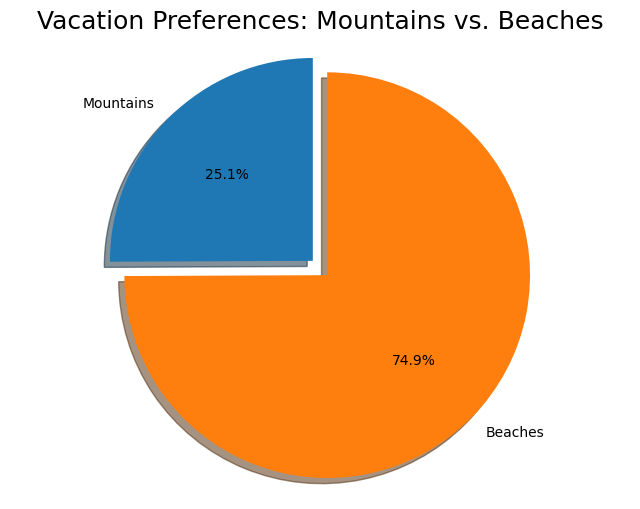

In [ ]:
target_column = 'Preference'
labels = 'Mountains', 'Beaches'

sizes = [
    dataset[target_column][dataset[target_column]==1].count(),
    dataset[target_column][dataset[target_column]==0].count()
]

explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    sizes, explode=explode,
    labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90
)

ax.axis('equal')
plt.title("Vacation Preferences: Mountains vs. Beaches", size=18)
plt.show()

# 5. Exploratory Data Analysis

### Categorical Data Distribution

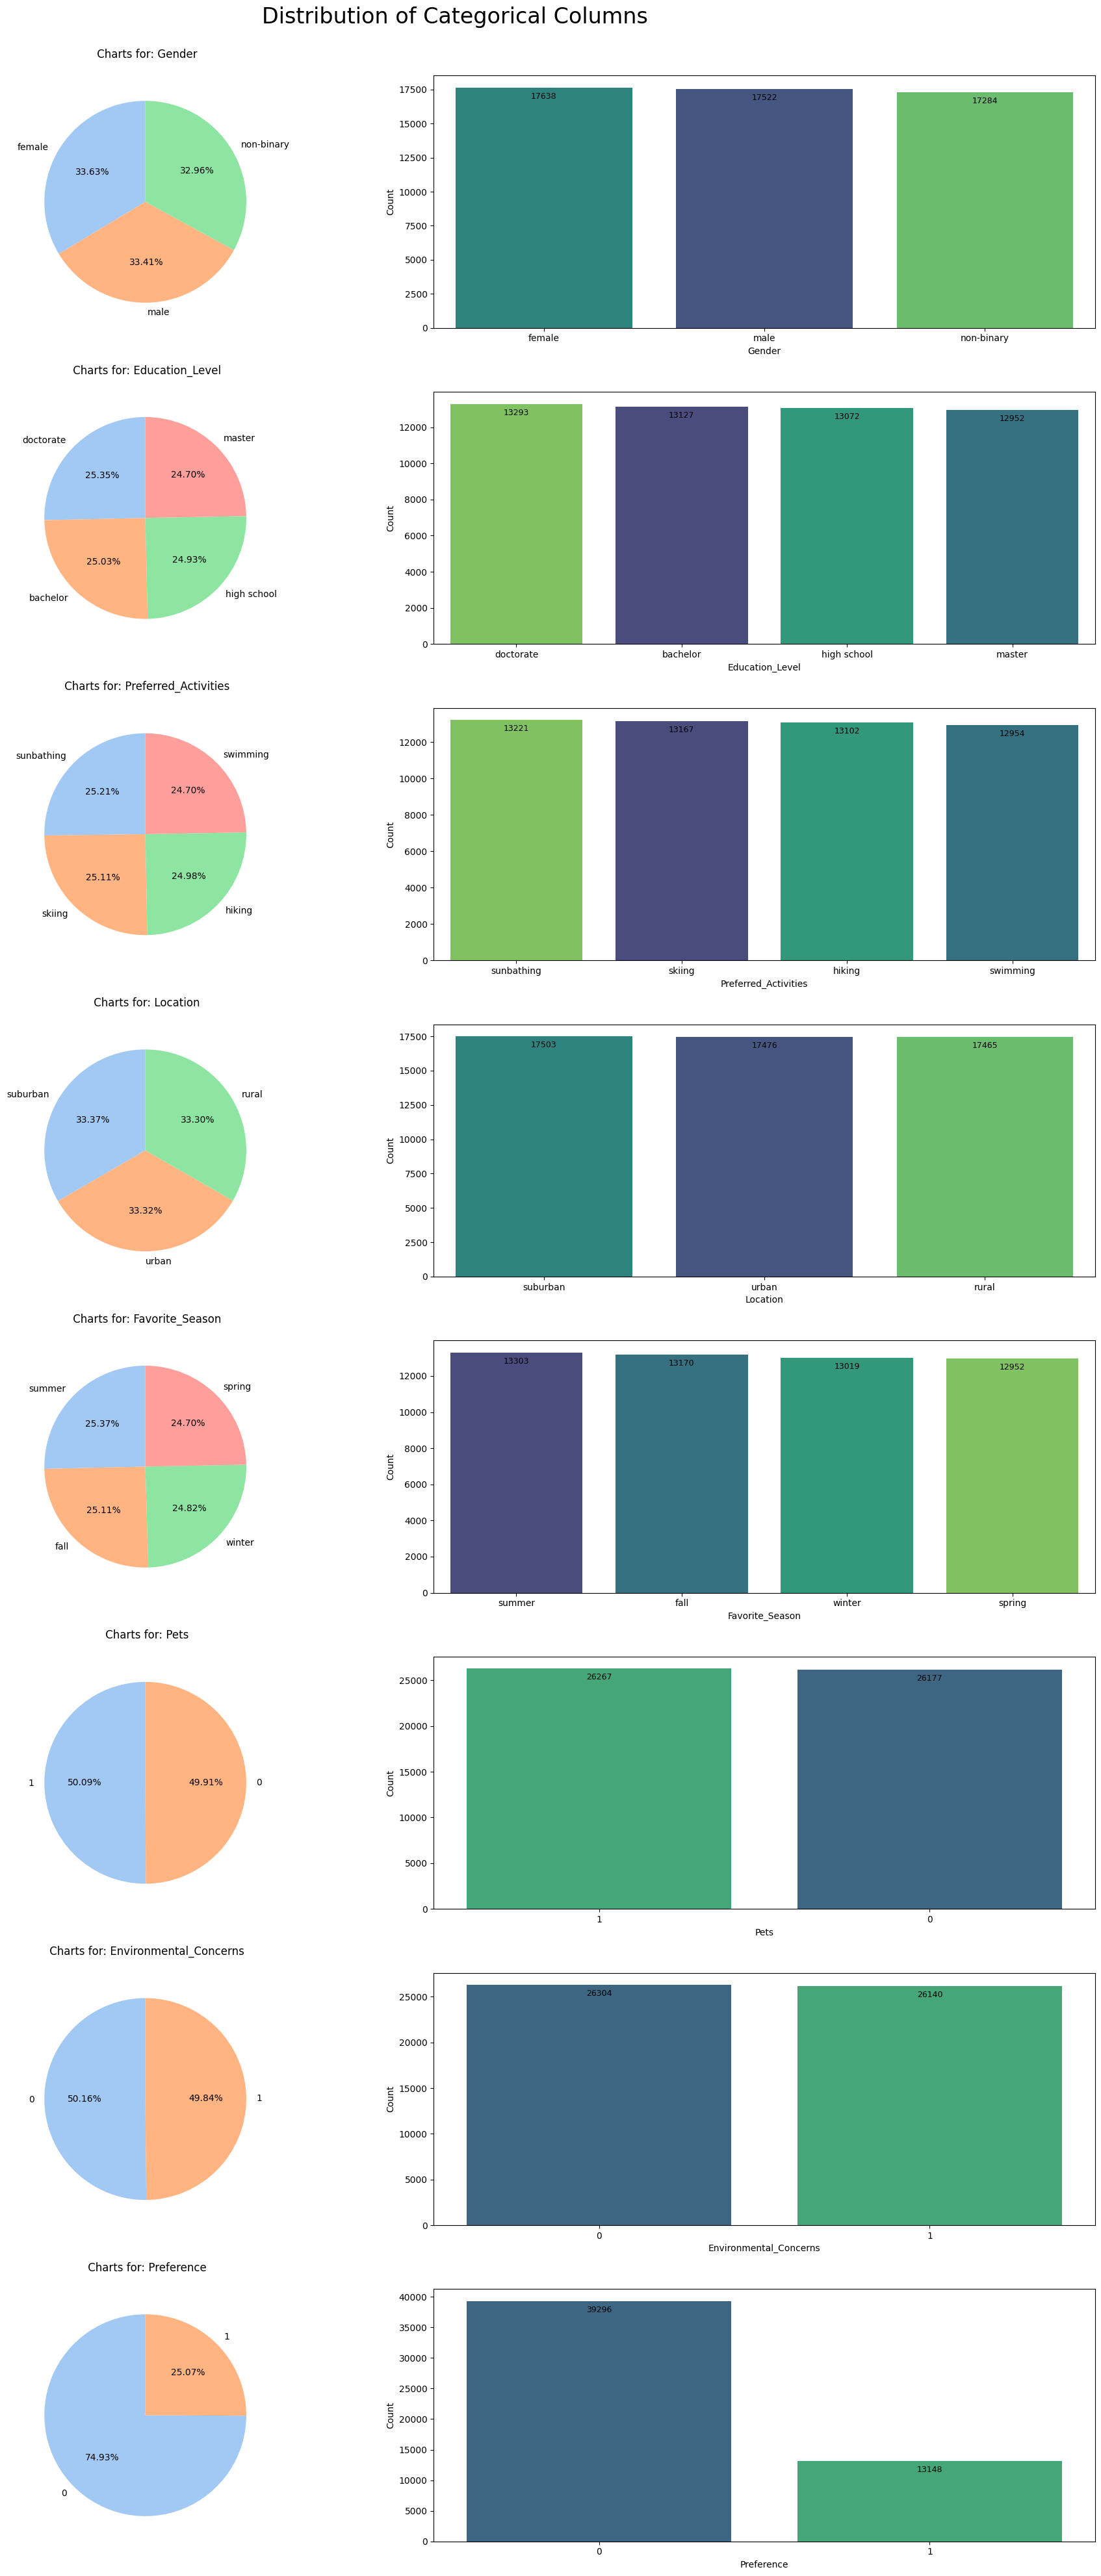

In [ ]:
# Categorical columns
cols = ['Gender', 'Education_Level', 'Preferred_Activities', 'Location',
        'Favorite_Season', 'Pets', 'Environmental_Concerns', 'Preference']

fig, ax = plt.subplots(len(cols), 2, figsize=(20, 40))
ax = ax.flatten()

plt.suptitle(
    'Distribution of Categorical Columns',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif",
    y=0.99
)

i = 0
for col in cols:
    # Pie Chart
    tdf = dataset[col].value_counts().reset_index()
    tdf.columns = [col, 'count']
    ax[i].pie(tdf['count'], labels=tdf[col], autopct='%.2f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[i].set_aspect('equal')

    # Bar Chart
    sns.countplot(data=dataset, x=col, ax=ax[i+1], palette='viridis', order=tdf[col], hue=col, legend=False) # Using ax[i+1] because pie chart uses ax[i]
    ax[i+1].tick_params(axis='x')
    ax[i+1].set_ylabel('Count')

    # Adding count number on the top of the bars in bar chart
    for p in ax[i+1].patches:
        height = p.get_height()
        ax[i+1].annotate(f'{int(height)}',
                         xy=(p.get_x() + p.get_width() / 2., height),
                         ha='center', va='top',
                         xytext=(0, -5), # Change vertical offset to negative so the numbers go inside the bars
                         textcoords='offset points',
                         fontsize=9, color='black')

    # Title for each plot set
    ax[i].set_title(f'\n \n Charts for: {col}', fontsize=12, pad=20)

    i += 2 # Jump 2 indexes because each column uses 2 subplots (pie and bar)

plt.tight_layout()
plt.show()

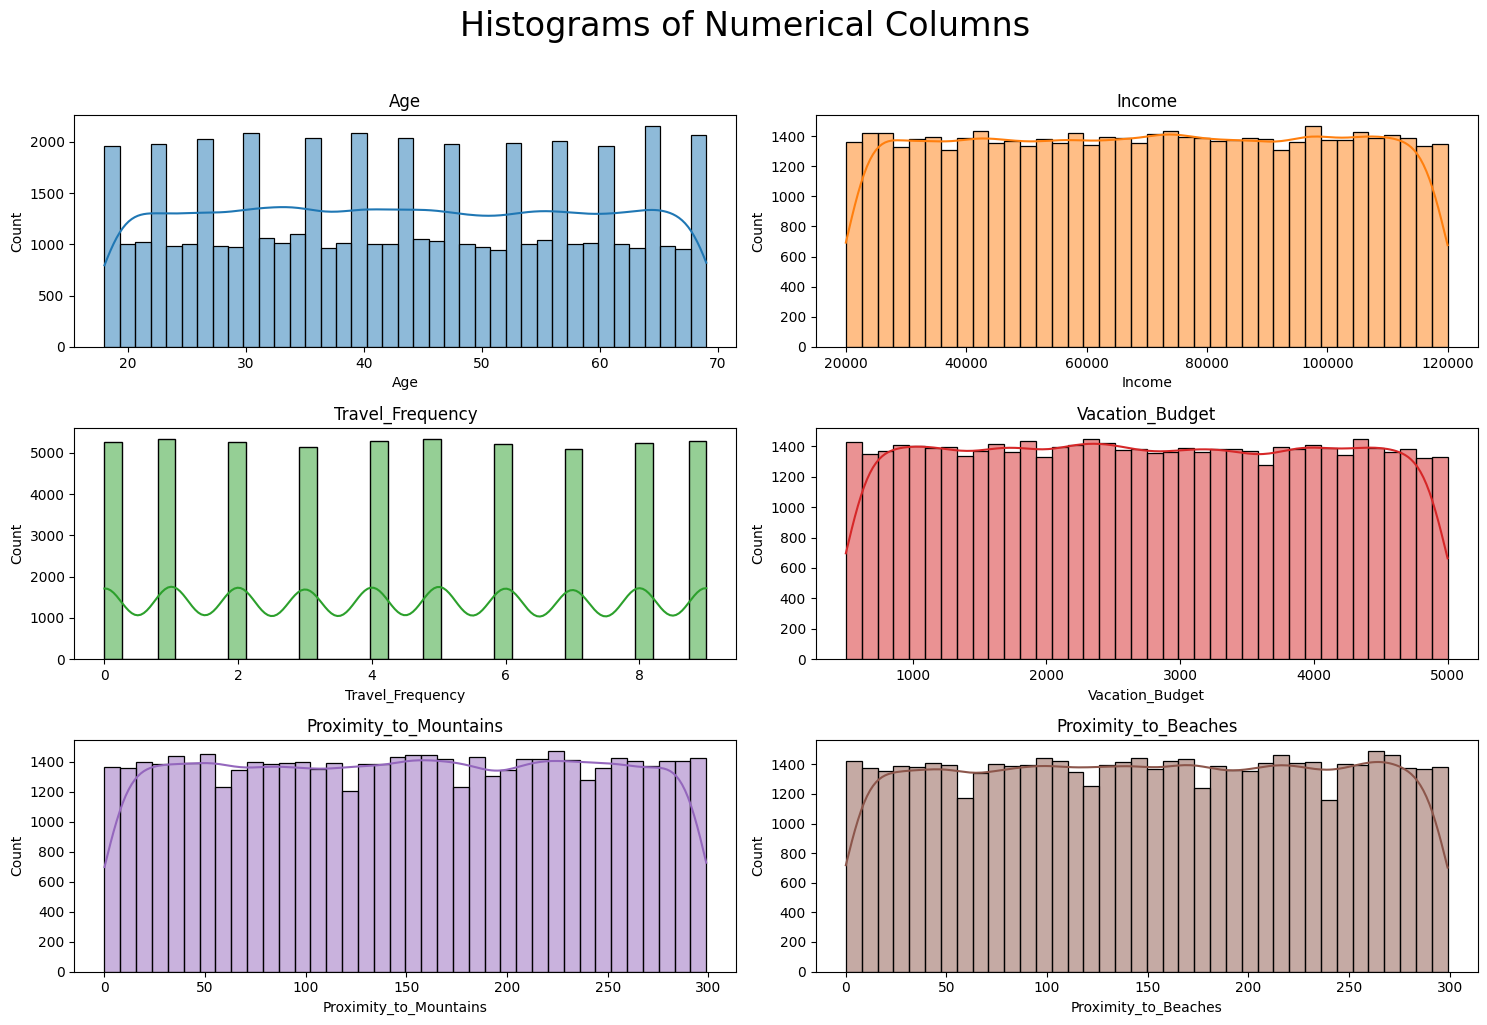

In [ ]:
# Plot Histogram of numeric Columns
subcols = ['Age', 'Income', 'Travel_Frequency', 'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches']

# Because there are 6 plot, we make a 3x2 (6) subplot
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
ax = ax.flatten()
i = 0

plt.suptitle(
    'Histograms of Numerical Columns',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif",
    y=1.02 # Nilai default biasanya sekitar 0.97-0.98, naikkan untuk jarak lebih jauh
)

# Definisikan palet warna. 'tab10' adalah pilihan yang bagus untuk warna yang berbeda.
# Anda bisa mencoba palet lain seperti 'Set1', 'Dark2', dll.
colors = sns.color_palette('tab10', n_colors=len(subcols))

for col in subcols:
    # Menggunakan parameter 'color' dengan warna dari list 'colors'
    sns.histplot(data=dataset, x=col, kde=True, ax=ax[i], color=colors[i])
    ax[i].set_title(f'{col}', fontsize=12) # Menambahkan judul untuk setiap histogram
    i += 1

plt.tight_layout()
plt.show()

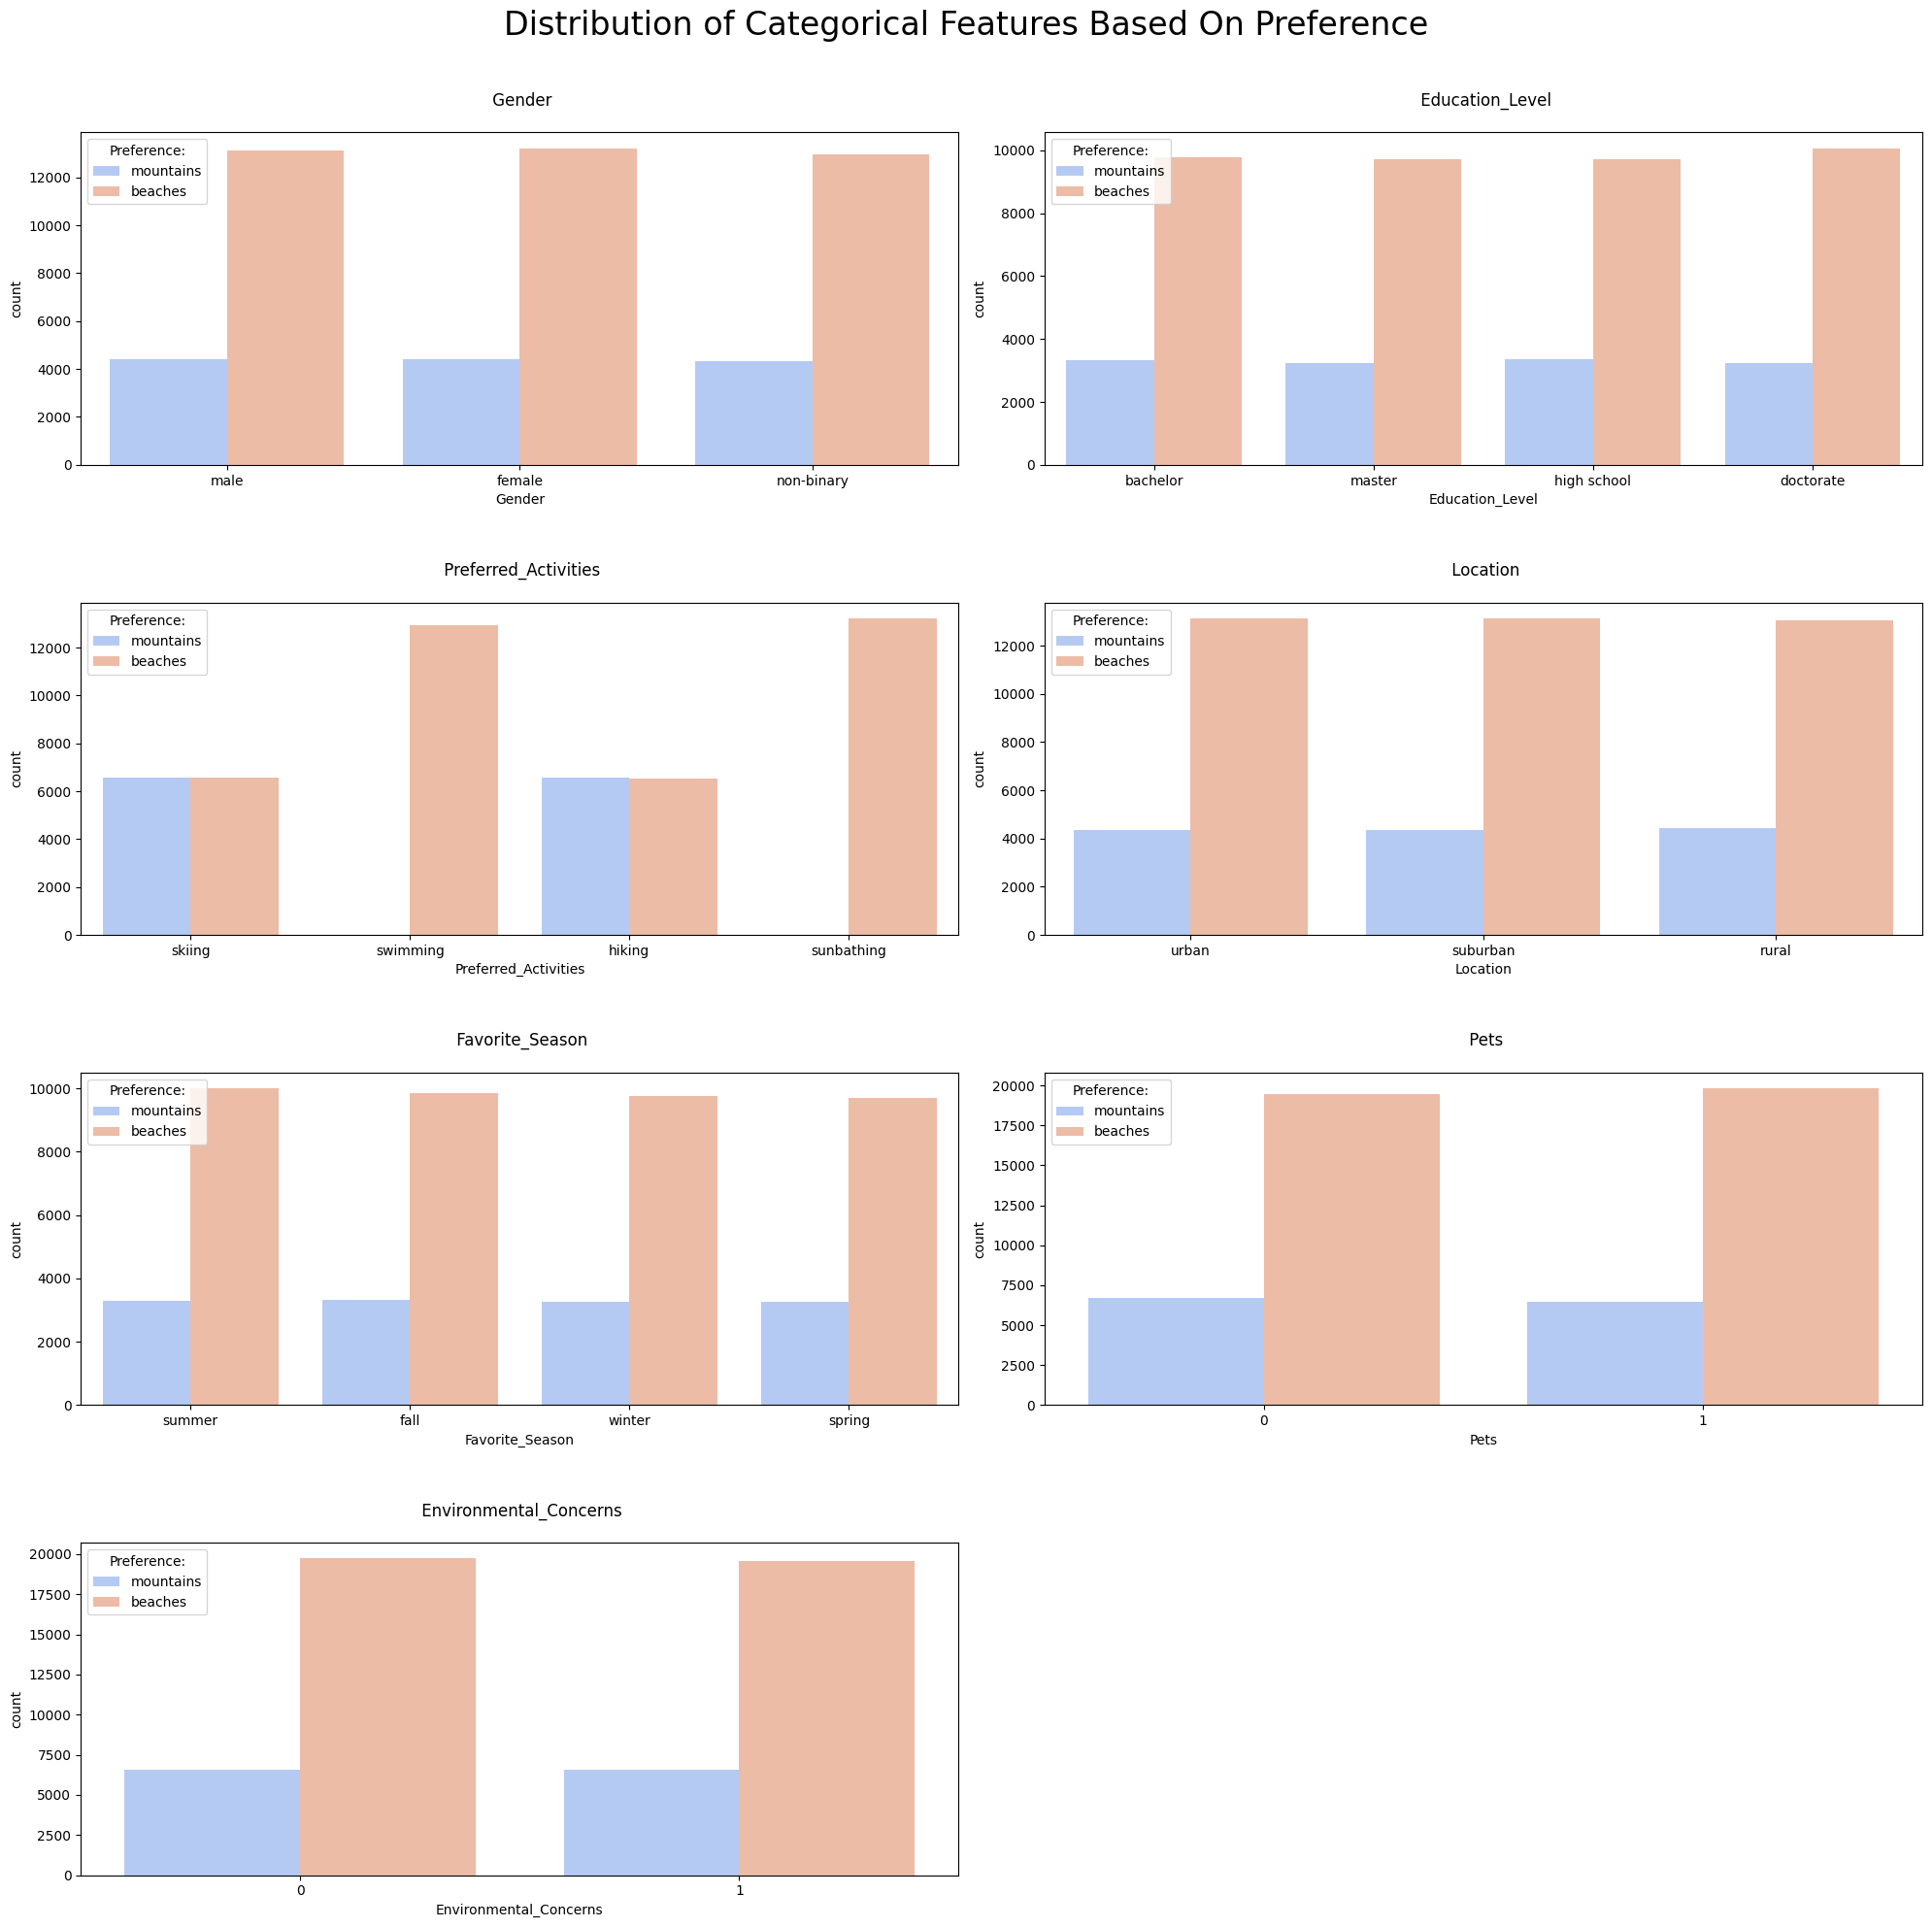

In [ ]:
# Distribution of Categorical Features vs. Target (Preference)
cols = ['Gender', 'Education_Level', 'Preferred_Activities', 'Location',
        'Favorite_Season', 'Pets', 'Environmental_Concerns']

# Because there are 7 plot, we make a 4x2 (total 8 subplot)
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
ax = ax.flatten()

plt.suptitle(
    'Distribution of Categorical Features Based On Preference',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif",
    y=0.99
)

i = 0
for col in cols:
    # Map the 'Preference' value directly inside the 'hue' argument
    # This creates a temporary Series for hue without changing the original DataFrame.
    sns.countplot(data=dataset, x=col, ax=ax[i],
                  hue=dataset['Preference'].map({0: 'beaches', 1: 'mountains'}),
                  palette='coolwarm')

    ax[i].set_title(f'\n \n {col}', fontsize=12, pad=20)
    ax[i].tick_params(axis='x')
    ax[i].legend(loc='upper left', title='Preference:')
    i += 1

# If there are unused subplots (due to an odd number of features), turn off their axes.
if i < len(ax):
    for j in range(i, len(ax)):
        ax[j].axis('off')

plt.tight_layout()
plt.show()

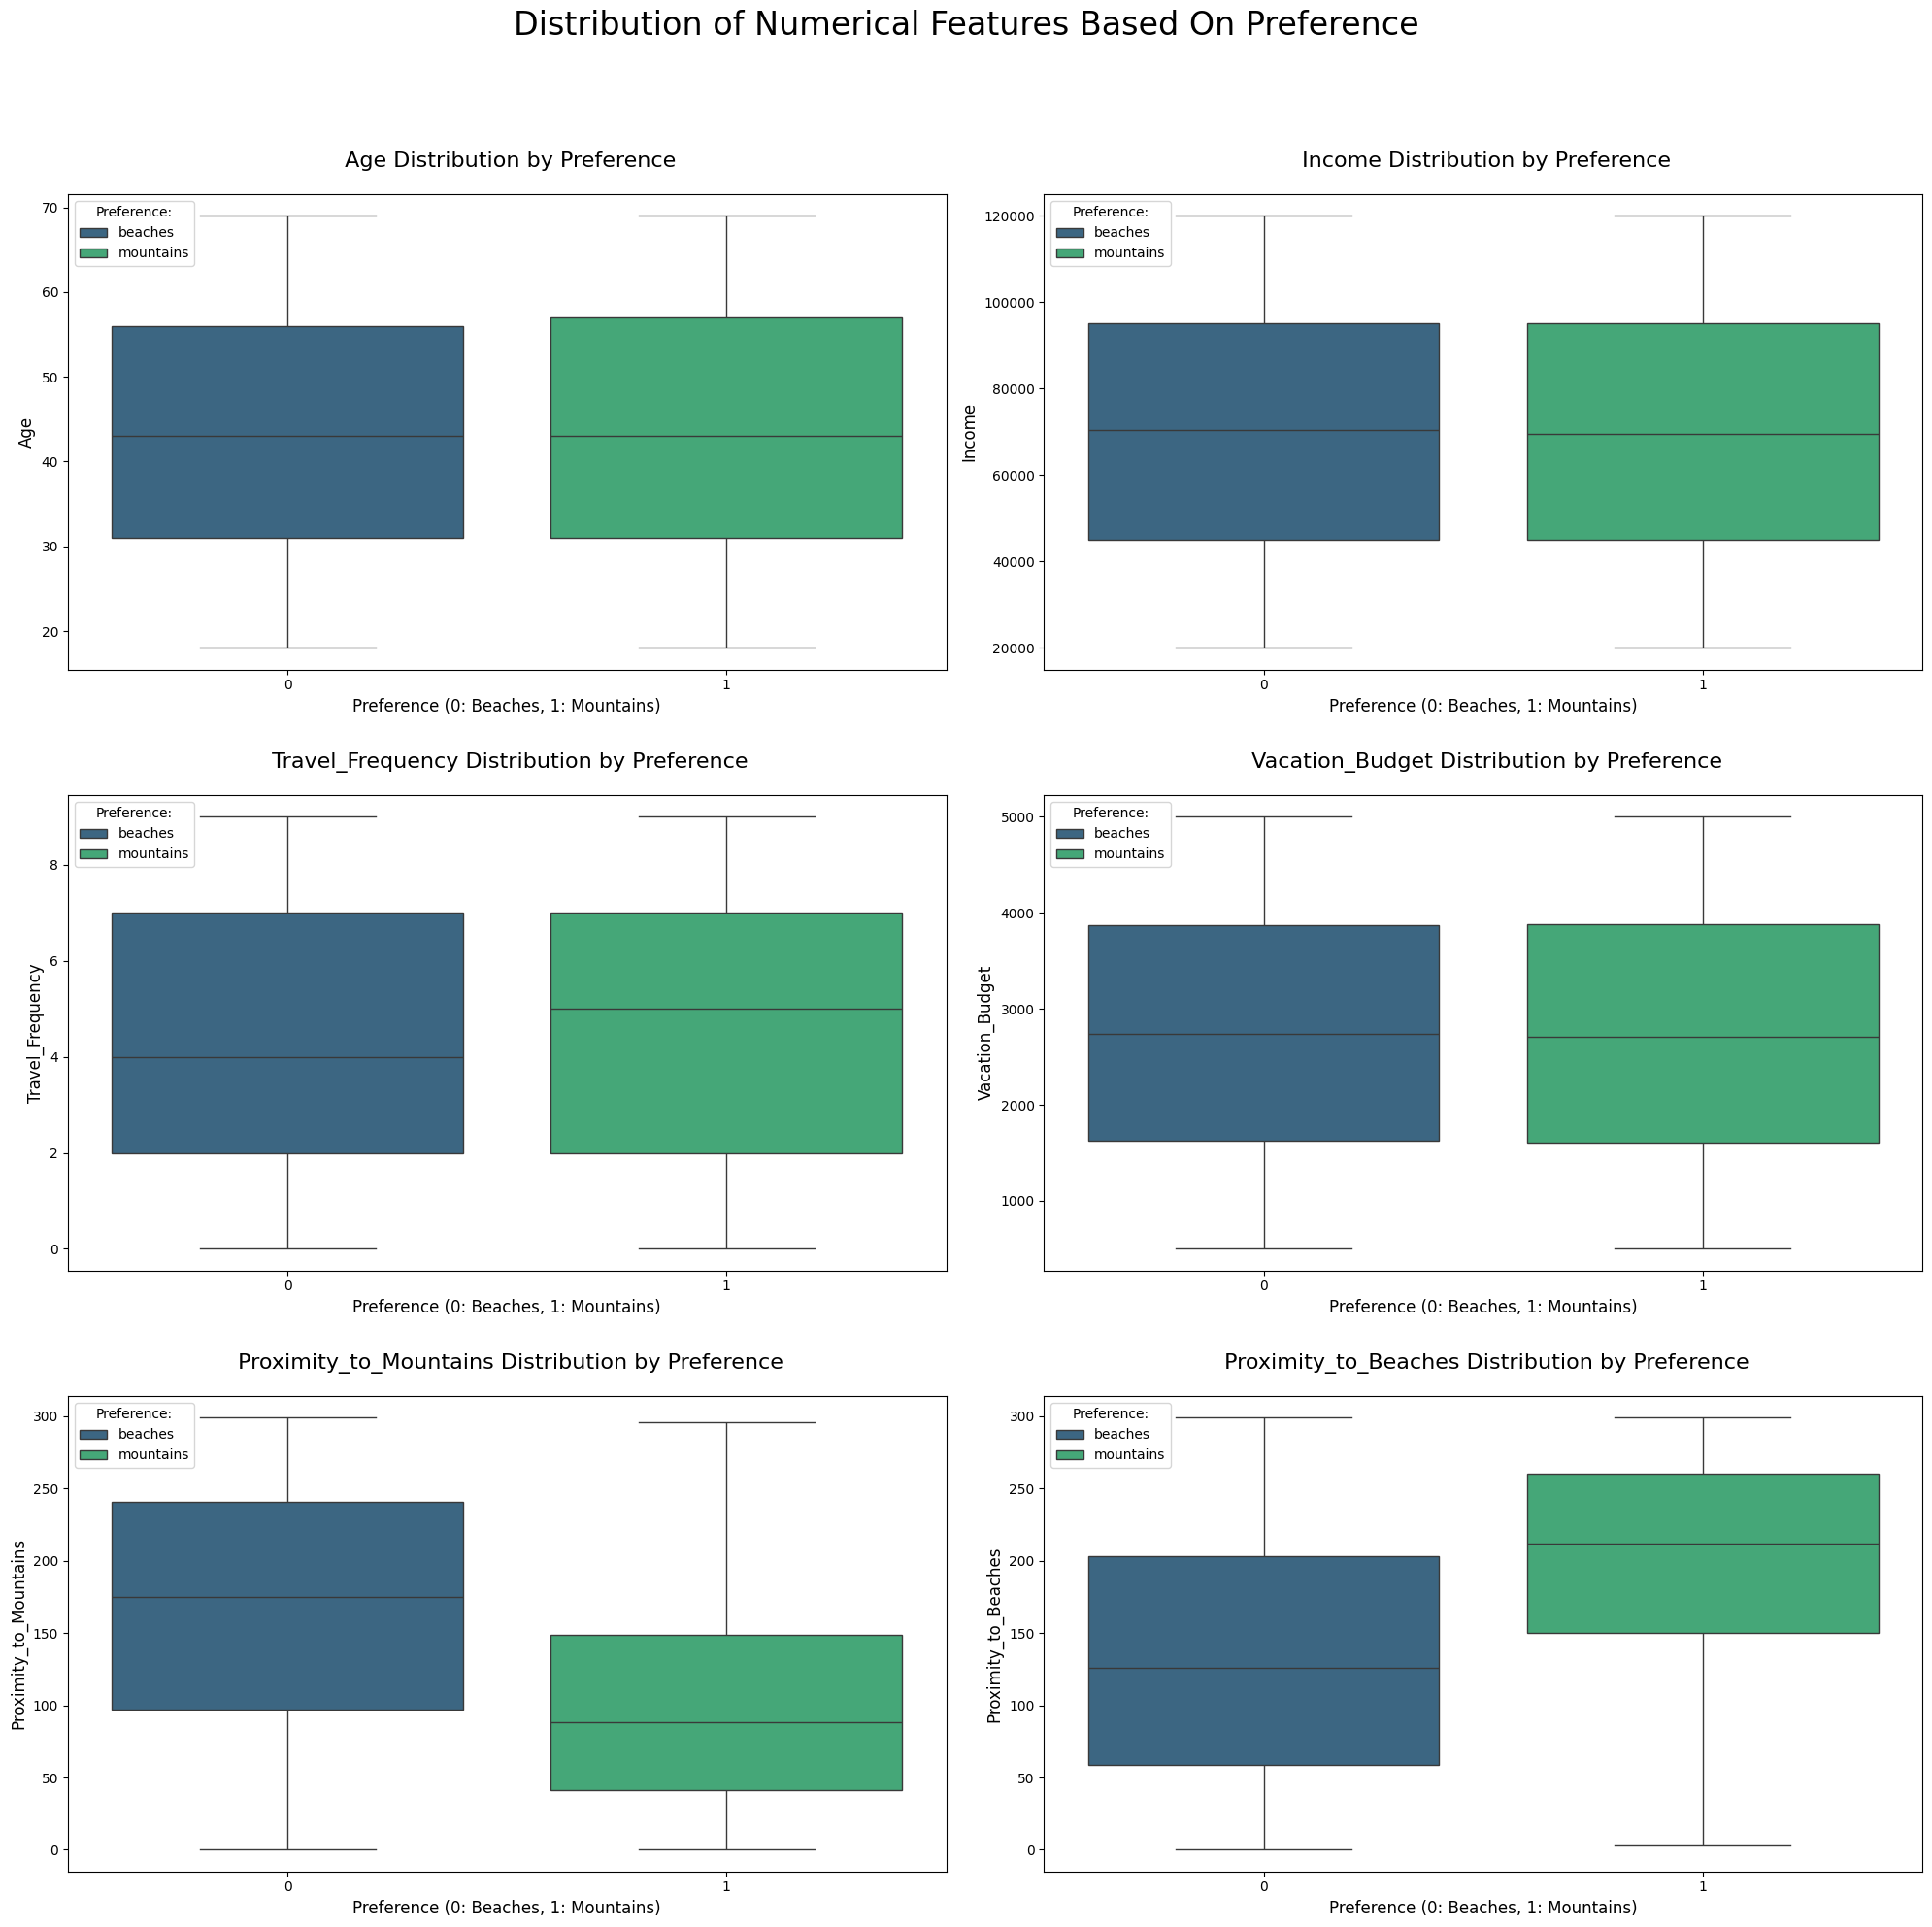

In [ ]:
# Distribution of Numerical Features vs. Target (Preference)
cols = ['Age', 'Income', 'Travel_Frequency', 'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches']

# Because there are 5 plot, we make a 3x2 (total 6 subplot)
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
ax = ax.flatten()

plt.suptitle(
    'Distribution of Numerical Features Based On Preference',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif",
    y=0.99 #
)

i = 0
for col in cols:
    # Use 'hue' argument with mapped 'Preference' values
    sns.boxplot(data=dataset, x='Preference', y=col, ax=ax[i],
                hue=dataset['Preference'].map({0: 'beaches', 1: 'mountains'}),
                palette='viridis')

    ax[i].set_title(f'\n {col} Distribution by Preference', fontsize=16, pad=20)
    ax[i].set_xlabel('Preference (0: Beaches, 1: Mountains)', fontsize=12) # Lebih jelas tentang sumbu X
    ax[i].set_ylabel(col, fontsize=12)
    ax[i].legend(loc='upper left', title='Preference:')

    i += 1

# If there are unused subplots (due to an odd number of features), turn off their axes.
if i < len(ax):
    for j in range(i, len(ax)):
        ax[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
plt.show()

# 6. Encode Categorical Data

In [ ]:
# Backup Data 1
dataset_backup = dataset.copy()

In [ ]:
# CHECKPOINT 1: START FROM HERE IF YOU MADE A MISTAKE AND WANT TO START OVER!!!!
dataset = dataset_backup.copy()

In [ ]:
dataset

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67,female,85325,master,3,hiking,1762,suburban,51,262,fall,1,0,1
52440,37,female,110346,bachelor,7,swimming,1676,urban,259,84,spring,1,0,0
52441,53,non-binary,71080,doctorate,7,swimming,3877,urban,164,27,fall,0,1,0
52442,40,female,75174,doctorate,9,swimming,4620,suburban,173,10,summer,0,1,0


In [ ]:
# Label Encoding for Education_Level because it's ordinal data
education_order = {
    'high school': 0,
    'bachelor': 1,
    'master': 2,
    'doctorate': 3
}

dataset['Education_Level'] = dataset['Education_Level'].map(education_order)
dataset

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,1,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,2,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,2,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,0,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,0,5,sunbathing,516,suburban,23,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67,female,85325,2,3,hiking,1762,suburban,51,262,fall,1,0,1
52440,37,female,110346,1,7,swimming,1676,urban,259,84,spring,1,0,0
52441,53,non-binary,71080,3,7,swimming,3877,urban,164,27,fall,0,1,0
52442,40,female,75174,3,9,swimming,4620,suburban,173,10,summer,0,1,0


In [ ]:
# One-Hot Encoding for non-ordinal data (Gender, Preferred_Activities, Location, Favorite_Season)
columns_for_onehot = ['Gender', 'Preferred_Activities', 'Location', 'Favorite_Season']
dataset = pd.get_dummies(dataset, columns=columns_for_onehot, dtype=int)

dataset

,Age,Income,Education_Level,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference,Gender_female,Gender_male,Gender_non-binary,Preferred_Activities_hiking,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Location_rural,Location_suburban,Location_urban,Favorite_Season_fall,Favorite_Season_spring,Favorite_Season_summer,Favorite_Season_winter
0,56,71477,1,9,2477,175,267,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,69,88740,2,1,4777,228,190,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
2,46,46562,2,0,1469,71,280,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1
3,32,99044,0,6,1482,31,255,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0
4,60,106583,0,5,516,23,151,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67,85325,2,3,1762,51,262,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0
52440,37,110346,1,7,1676,259,84,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
52441,53,71080,3,7,3877,164,27,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
52442,40,75174,3,9,4620,173,10,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0


# 7. Split Dataset into Dependent and Independent Variables

In [ ]:
# Backup Data 2
dataset_backup_2 = dataset.copy()

In [ ]:
# CHECKPOINT 2: START FROM HERE IF YOU MADE A MISTAKE AND WANT TO START OVER!!!!
dataset = dataset_backup_2.copy()

In [ ]:
# Identify response variable:
x = dataset.drop(columns="Preference")
y = dataset["Preference"]

In [ ]:
# Generate training and test datasets of dependent and independent variables

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    stratify=y, # To resolve any class imbalance - use stratify parameter.
    test_size = 0.2, # use 0.1 if data is huge.
    random_state = 0
)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (41955, 23)
Number transactions y_train dataset:  (41955,)
Number transactions X_test dataset:  (10489, 23)
Number transactions y_test dataset:  (10489,)


In [ ]:
X_train

,Age,Income,Education_Level,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Gender_female,Gender_male,Gender_non-binary,Preferred_Activities_hiking,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Location_rural,Location_suburban,Location_urban,Favorite_Season_fall,Favorite_Season_spring,Favorite_Season_summer,Favorite_Season_winter
29421,65,33079,3,3,3624,215,209,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
41383,18,67457,1,1,3539,68,172,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
16608,50,110344,2,2,4609,52,132,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
51217,61,48797,3,3,1196,180,83,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3488,69,70353,2,1,4799,240,27,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,69,50728,1,7,3112,230,232,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
3521,40,105148,0,8,1788,175,73,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
19437,21,20709,1,0,2794,48,295,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
782,34,61052,3,8,1550,12,222,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
X_test

,Age,Income,Education_Level,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Gender_female,Gender_male,Gender_non-binary,Preferred_Activities_hiking,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Location_rural,Location_suburban,Location_urban,Favorite_Season_fall,Favorite_Season_spring,Favorite_Season_summer,Favorite_Season_winter
51909,21,114691,3,2,3365,231,16,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
11644,25,49134,2,1,2525,72,209,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
39335,32,108722,1,1,2798,268,221,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1
4239,65,104015,3,0,2249,220,128,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0
34760,48,78926,0,9,1968,233,108,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39396,33,66428,0,7,3148,219,153,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1
15224,20,48195,1,8,4619,168,31,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0
49781,43,61451,1,9,3828,98,257,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
25595,22,28725,1,8,1764,183,171,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1


# 8. Feature Scaling

In [ ]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
X_train

,Age,Income,Education_Level,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Gender_female,Gender_male,Gender_non-binary,Preferred_Activities_hiking,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Location_rural,Location_suburban,Location_urban,Favorite_Season_fall,Favorite_Season_spring,Favorite_Season_summer,Favorite_Season_winter
29421,1.434060,-1.281260,1.334232,-0.520738,0.678105,0.750134,0.682131,1.000167,1.002936,-0.715352,-0.706311,1.429211,-0.575745,-0.578681,1.716963,-0.572552,-0.707752,-0.707827,1.416948,-0.579855,-0.574130,-0.582607,1.745783
41383,-1.700780,-0.089159,-0.450373,-1.215591,0.612570,-0.948321,0.254569,-0.999833,-0.997073,-0.715352,-0.706311,1.429211,-0.575745,-0.578681,-0.582424,1.746566,-0.707752,-0.707827,1.416948,-0.579855,-0.574130,-0.582607,1.745783
16608,0.433579,1.398004,0.441929,-0.868164,1.437539,-1.133187,-0.207659,1.000167,-0.997073,-0.715352,-0.706311,1.429211,1.736881,-0.578681,-0.582424,-0.572552,1.412925,-0.707827,-0.705742,-0.579855,-0.574130,1.716422,-0.572809
51217,1.167265,-0.736218,1.334232,-0.520738,-1.193880,0.345740,-0.773889,-0.999833,-0.997073,1.397913,-0.706311,-0.699687,-0.575745,1.728069,-0.582424,-0.572552,1.412925,-0.707827,-0.705742,-0.579855,1.741765,-0.582607,-0.572809
3488,1.700855,0.011264,0.441929,-1.215591,1.584029,1.038987,-1.421009,-0.999833,-0.997073,1.397913,-0.706311,-0.699687,-0.575745,-0.578681,1.716963,-0.572552,-0.707752,-0.707827,1.416948,-0.579855,-0.574130,1.716422,-0.572809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,1.700855,-0.669258,-0.450373,0.868968,0.283354,0.923445,0.947912,1.000167,1.002936,-0.715352,1.415808,-0.699687,1.736881,-0.578681,-0.582424,-0.572552,-0.707752,1.412774,-0.705742,-0.579855,1.741765,-0.582607,-0.572809
3521,-0.233408,1.217826,-1.342675,1.216394,-0.737448,0.287969,-0.889446,1.000167,-0.997073,1.397913,-0.706311,-0.699687,1.736881,-0.578681,-0.582424,-0.572552,-0.707752,-0.707827,1.416948,-0.579855,1.741765,-0.582607,-0.572809
19437,-1.500684,-1.710206,-0.450373,-1.563017,0.038176,-1.179403,1.675922,-0.999833,-0.997073,-0.715352,1.415808,-0.699687,-0.575745,-0.578681,1.716963,-0.572552,-0.707752,-0.707827,1.416948,1.724570,-0.574130,-0.582607,-0.572809
782,-0.633600,-0.311260,1.334232,1.216394,-0.920946,-1.595352,0.832355,-0.999833,-0.997073,1.397913,-0.706311,-0.699687,-0.575745,1.728069,-0.582424,-0.572552,-0.707752,-0.707827,1.416948,-0.579855,1.741765,-0.582607,-0.572809


In [ ]:
X_test

,Age,Income,Education_Level,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Gender_female,Gender_male,Gender_non-binary,Preferred_Activities_hiking,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Location_rural,Location_suburban,Location_urban,Favorite_Season_fall,Favorite_Season_spring,Favorite_Season_summer,Favorite_Season_winter
51909,-1.507021,1.548181,1.335989,-0.854899,0.488996,0.942783,-1.549583,-1.009291,-0.996099,-0.697975,-0.716482,1.414618,-0.582451,-0.580249,1.744581,-0.573497,1.424386,-0.707511,-0.711764,-0.575993,-0.566891,1.710846,-0.582011
11644,-1.239570,-0.721501,0.442746,-1.203702,-0.158943,-0.894518,0.689611,0.990795,-0.996099,1.432717,-0.716482,-0.706905,-0.582451,1.723397,-0.573204,-0.573497,-0.702057,1.413405,-0.711764,-0.575993,-0.566891,1.710846,-0.582011
39335,-0.771531,1.341525,-0.450496,-1.203702,0.051637,1.370330,0.828835,0.990795,1.003917,-0.697975,1.395709,-0.706905,-0.582451,-0.580249,-0.573204,1.743688,1.424386,-0.707511,-0.711764,-0.575993,-0.566891,-0.584506,1.718182
4239,1.434937,1.178562,1.335989,-1.552506,-0.371837,0.815674,-0.250155,0.990795,1.003917,-0.697975,-0.716482,1.414618,1.716882,-0.580249,-0.573204,-0.573497,1.424386,-0.707511,-0.711764,-0.575993,1.764007,-0.584506,-0.582011
34760,0.298272,0.309943,-1.343738,1.586724,-0.588588,0.965893,-0.482195,-1.009291,-0.996099,-0.697975,-0.716482,1.414618,-0.582451,1.723397,-0.573204,-0.573497,-0.702057,1.413405,-0.711764,-0.575993,-0.566891,-0.584506,1.718182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39396,-0.704668,-0.122757,-1.343738,0.889118,0.321611,0.804118,0.039896,0.990795,1.003917,1.432717,-0.716482,-0.706905,1.716882,-0.580249,-0.573204,-0.573497,-0.702057,-0.707511,1.404961,-0.575993,-0.566891,-0.584506,1.718182
15224,-1.573883,-0.754010,-0.450496,1.237921,1.456276,0.214796,-1.375553,0.990795,1.003917,-0.697975,1.395709,-0.706905,-0.582451,-0.580249,-0.573204,1.743688,1.424386,-0.707511,-0.711764,-0.575993,-0.566891,1.710846,-0.582011
49781,-0.036042,-0.295068,-0.450496,1.586724,0.846133,-0.594079,1.246509,0.990795,-0.996099,1.432717,-0.716482,-0.706905,-0.582451,1.723397,-0.573204,-0.573497,-0.702057,1.413405,-0.711764,-0.575993,-0.566891,-0.584506,1.718182
25595,-1.440158,-1.428091,-0.450496,1.237921,-0.745945,0.388126,0.248733,0.990795,-0.996099,1.432717,-0.716482,-0.706905,-0.582451,-0.580249,1.744581,-0.573497,-0.702057,-0.707511,1.404961,-0.575993,-0.566891,-0.584506,1.718182


# 9. Model Selection

In [ ]:
# Compare Baseline Classification Algorithms
# Using Accuracy and ROC AUC Mean Metrics

models = []
models.append(
    (
        'Logistic Regression',
        LogisticRegression(
            solver='liblinear',
            random_state=0,
            class_weight='balanced'
        )
    )
)

models.append(
    (
        'Random Forest',
        RandomForestClassifier(
            n_estimators=100,
            criterion='entropy',
            random_state=0
        )
    )
)

models.append(
    (
        'XGBoost',
        XGBClassifier(
            eval_metric='auc',
            random_state=0
        )
    )
)
models.append(
    (
        'AdaBoost',
        AdaBoostClassifier(
            random_state=0
        )
    )
)
models.append(
    (
        'Gradient Boost',
        GradientBoostingClassifier(
            random_state=0
        )
    )
)
models.append(
    (
        'SVM',
        SVC(
            probability=True, # ROC AUC needs probability
            random_state=0
        )
    )
)

# Evaluating Model Results:
acc_results = [] #Accuracy
auc_results = [] #ROC-AUC
names = []

# Set table to populate with performance result
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)

# Evaluate model
i = 0
for name, model in models: #Parameter Tuning
    kfold = KFold(n_splits = 10) #10 Cross validation
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] =[
        name,
        round(cv_auc_results.mean()*100,2),
        round(cv_auc_results.std()*100,2),
        round(cv_acc_results.mean()*100,2),
        round(cv_acc_results.std()*100,2)
    ]
    i += 1

model_results.sort_values(
    by=['ROC AUC Mean'], ascending = False
)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,100.00,0.00,98.97,0.14
2,XGBoost,100.00,0.00,99.69,0.13
4,Gradient Boost,99.98,0.00,99.42,0.09
1,Random Forest,99.97,0.01,99.18,0.15
5,SVM,99.95,0.01,98.94,0.13
3,AdaBoost,99.55,0.05,96.43,0.41


In [ ]:
model_results.sort_values(
    by=['Accuracy Mean'], ascending = False
)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,XGBoost,100.00,0.00,99.69,0.13
4,Gradient Boost,99.98,0.00,99.42,0.09
1,Random Forest,99.97,0.01,99.18,0.15
0,Logistic Regression,100.00,0.00,98.97,0.14
5,SVM,99.95,0.01,98.94,0.13
3,AdaBoost,99.55,0.05,96.43,0.41


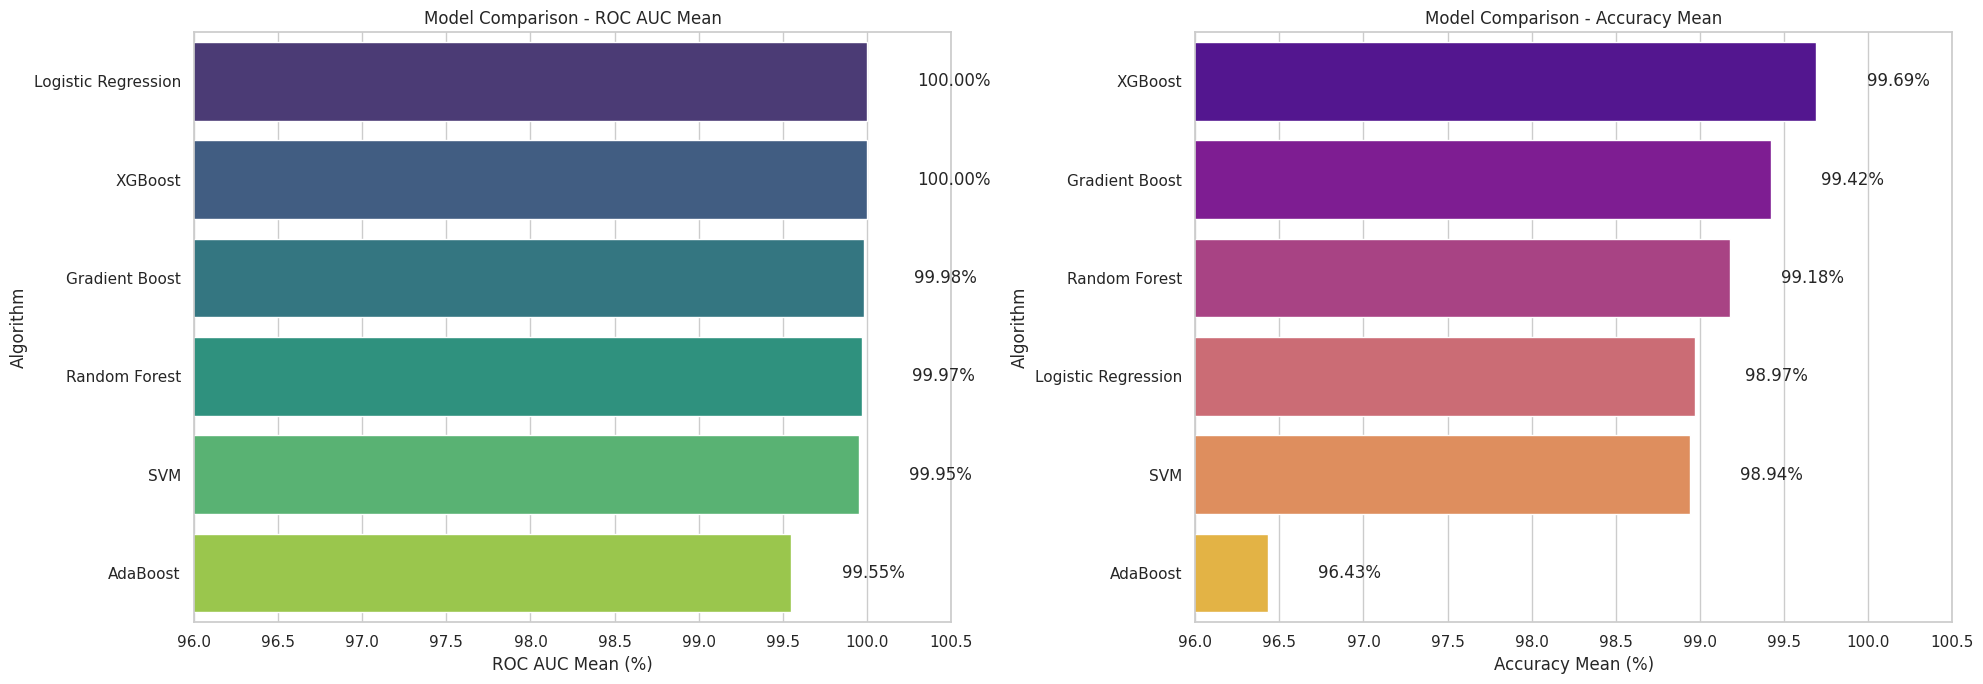

In [ ]:
# Set Visualization Style
sns.set(style='whitegrid')

# Create a figure with 1 row and 2 subplot columns
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Bar Chart - Sort by ROC AUC Mean ---------------------------
roc_sorted = model_results.sort_values(by='ROC AUC Mean', ascending=False)
sns.barplot(data=roc_sorted, x='ROC AUC Mean', y='Algorithm', hue='Algorithm', palette='viridis', ax=axes[0], legend=False)

# Add percentage labels to the bars
for i, (value, name) in enumerate(zip(roc_sorted['ROC AUC Mean'], roc_sorted['Algorithm'])):
    axes[0].text(value + 0.3, i, f'{value:.2f}%', va='center') # Text position adjustment

axes[0].set_title('Model Comparison - ROC AUC Mean')
axes[0].set_xlabel('ROC AUC Mean (%)')
axes[0].set_ylabel('Algorithm')
axes[0].set_xlim(96, 100.5) # Adjust the x limit to focus on high values.

# Bar Chart - Sort by Accuracy Mean ---------------------------
acc_sorted = model_results.sort_values(by='Accuracy Mean', ascending=False)
sns.barplot(data=acc_sorted, x='Accuracy Mean', y='Algorithm', hue='Algorithm', palette='plasma', ax=axes[1], legend=False)

# Add percentage labels to the bars
for i, (value, name) in enumerate(zip(acc_sorted['Accuracy Mean'], acc_sorted['Algorithm'])):
    axes[1].text(value + 0.3, i, f'{value:.2f}%', va='center') # Text position adjustment

axes[1].set_title('Model Comparison - Accuracy Mean')
axes[1].set_xlabel('Accuracy Mean (%)')
axes[1].set_ylabel('Algorithm')
axes[1].set_xlim(96, 100.5) # Adjust the x limit to focus on high values.

plt.tight_layout()
plt.show()

The best classification model for this dataset is **XGBoost**.

Why XGBoost?
1. **Highest Mean ROC AUC**: XGBoost achieves a perfect Mean ROC AUC of 100.00%, indicating its excellent ability to differentiate between positive and negative classes. Logistic Regression also achieves 100.00%, but we need to look at other metrics for differentiation.
2. **Lowest STD ROC AUC**: With a STD ROC AUC of 0.00%, XGBoost shows perfect consistency in ROC AUC performance across cross-validation folds. Logistic Regression also has 0.00%.
3. **Highest Mean Accuracy**: XGBoost has the highest Mean Accuracy at 99.69%, meaning it makes the most correct predictions overall. This is slightly higher compared to Logistic Regression (98.97%) and Gradient Boost (99.42%).
4. **Very Low Accuracy STD**: XGBoost’s Accuracy STD is 0.13%, showing very high consistency in accuracy. Although Gradient Boost is slightly lower (0.09%), this difference is very small and XGBoost still excels in Mean Accuracy.


# 10. Train & Evaluate Model

In [ ]:
# Train & evaluate Chosen Model: XGBoost

# Fit Chosen Model on the Training dataset:
chosen_model = XGBClassifier(eval_metric='auc', random_state=0)
chosen_model.fit(X_train, y_train)

# Predict the Test set results
y_pred = chosen_model.predict(X_test)
y_proba = chosen_model.predict_proba(X_test)[:, 1]

# Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy on Test Set:  {acc * 100:.2f}%")
print(f"ROC AUC on Test Set:   {roc_auc * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

Accuracy on Test Set:  87.57%
ROC AUC on Test Set:   91.89%
Precision: 0.67
Recall:    0.99
F1 Score:  0.80


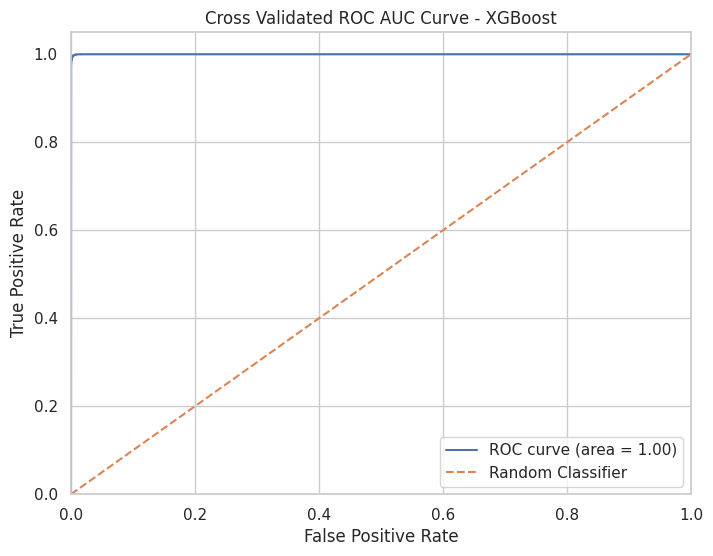

In [ ]:
# Evaluate the model using ROC Graph
y_cv_probs = cross_val_predict(chosen_model, X_train, y_train, cv=kfold, method='predict_proba')[:, 1]

#ROC-AUC dari Hyperparameter Tuning Chosen Model (Cross Validation)
fpr, tpr, _ = roc_curve(y_train, y_cv_probs)
roc_auc = roc_auc_score(y_train, y_cv_probs)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier') # Garis baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross Validated ROC AUC Curve - XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### ROC AUC Curve – Cross Validation (Training Set)
*	AUC = 1.00 (100%)
*	The ROC curve is practically perfect.
*	This indicates the model performs great on the training data.
*	But, it can be a sign of overfitting, especially if it differs significantly from the test set.


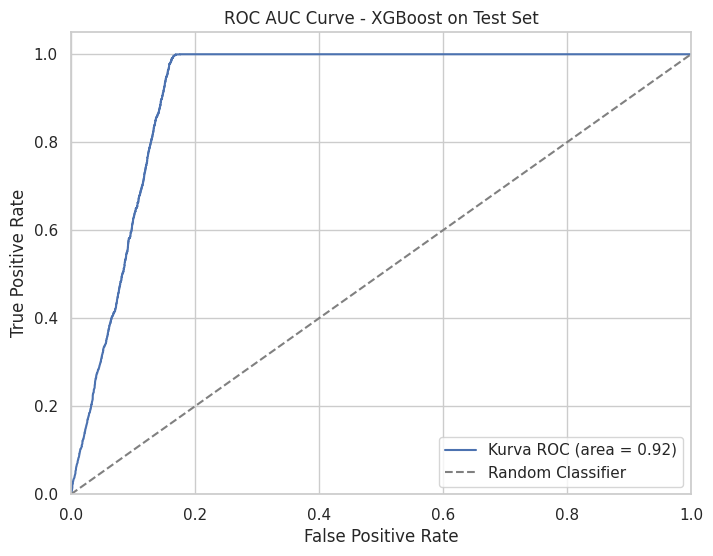

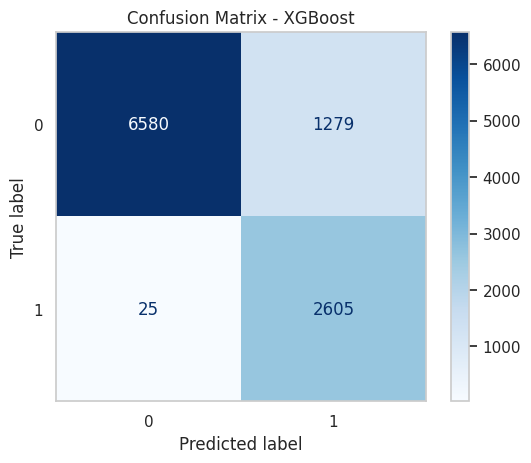

In [ ]:
# Evaluate the model using ROC Graph on TEST SET
# Calculate False Positive Rate (fpr) and True Positive Rate (tpr) for TEST SET
# using y_test (true label) and y_proba (prediction probability on test set)
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Calculate ROC AUC Score for TEST SET
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Kurva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier') # Garis baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve - XGBoost on Test Set') # Judul diubah untuk mencerminkan Test Set
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.grid(False)
plt.show()

### ROC AUC Curve – Test Set
*	AUC = 0.92 (92%). Even though performance drops slightly from the training set (1.00 → 0.92), this is still very good.
*	The ROC curve is well above the random line.
*	This shows the model also performs well on test data.
* Maybe there is a slight overfitting.

### Confusion Matrix
* Accuracy:  87.57%
* Precision: 0.67
* Recall:    0.99
* F1 Score:  0.80
* The model is very strong at detecting positive cases (recall = 0.99), meaning it rarely misses a true positive. However, it produces a relatively high number of false positives, which lowers precision (0.67).
* This is important if false positives are costly in your application.


# 11. Storing Model to Pickle

In [ ]:
import pickle

In [ ]:
# Saving chosen_model for the app (XGBoost)
pickle.dump(chosen_model, open("Vacation_Preference_XGBoost_Model.pkl", 'wb'))

# -------- **CEK** --------

In [ ]:
dataset_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              52444 non-null  int64
 1   Income                           52444 non-null  int64
 2   Education_Level                  52444 non-null  int64
 3   Travel_Frequency                 52444 non-null  int64
 4   Vacation_Budget                  52444 non-null  int64
 5   Proximity_to_Mountains           52444 non-null  int64
 6   Proximity_to_Beaches             52444 non-null  int64
 7   Pets                             52444 non-null  int64
 8   Environmental_Concerns           52444 non-null  int64
 9   Preference                       52444 non-null  int64
 10  Gender_female                    52444 non-null  int64
 11  Gender_male                      52444 non-null  int64
 12  Gender_non-binary                52444 non-nul

In [ ]:
dataset.head(5)

,Age,Income,Education_Level,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference,Gender_female,Gender_male,Gender_non-binary,Preferred_Activities_hiking,Preferred_Activities_skiing,Preferred_Activities_sunbathing,Preferred_Activities_swimming,Location_rural,Location_suburban,Location_urban,Favorite_Season_fall,Favorite_Season_spring,Favorite_Season_summer,Favorite_Season_winter
0,56,71477,1,9,2477,175,267,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,69,88740,2,1,4777,228,190,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
2,46,46562,2,0,1469,71,280,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1
3,32,99044,0,6,1482,31,255,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0
4,60,106583,0,5,516,23,151,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
